# Detector beams

### Wei & Fu (2014). On horizontal resolution for seismic acquisition geometries in complex 3D media. Journal of Applied Geophysics, September 2014. [DOI: 10.1016/j.jappgeo.2014.06.011](10.1016/j.jappgeo.2014.06.011).

We need the wavenumber coefficients of a volume. Let's use Penobscot. [Info about this 3D.](https://terranubis.com/datainfo/Penobscot)

I'm also using [Volker's 2002 thesis.](https://repository.tudelft.nl/islandora/object/uuid%3A2fc9ed13-20a2-4dbd-84bc-7beec96f8e07)

In [57]:
import segyio

with segyio.open('/home/matt/Dropbox/dev/geocomp-19/data/Penobscot_0-1000ms.sgy') as f:
    d = segyio.cube(f)

In [58]:
d.shape

(601, 481, 251)

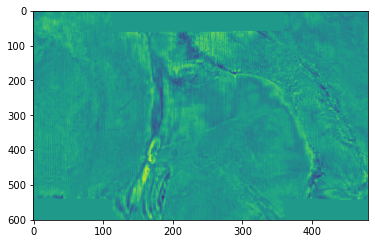

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(d[..., 100], aspect=0.5)

In [128]:
import numpy as np

D = np.fft.fft2(d, s=(128, 64), axes=(0, 1))

In [129]:
D.shape

(128, 64, 251)

In [130]:
D_ = np.fft.fftshift(D)

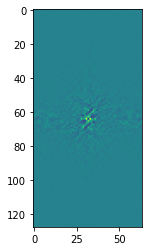

In [131]:
plt.figure(figsize=(4, 4))
plt.imshow(D_[..., 200].real)

## Try resizing image first

In [85]:
import scipy.ndimage as ndi

d_ = ndi.zoom(d, zoom=(1, 2, 1))

In [87]:
d_.shape

(601, 962, 251)

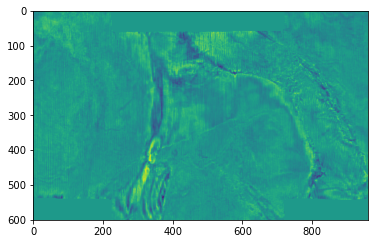

In [88]:
plt.imshow(d_[..., 100])

In [105]:
DD = np.fft.fft2(d_, s=(128, 128), axes=(0, 1))
DD_ = np.fft.fftshift(DD)

In [106]:
DD_.shape

(128, 128, 251)

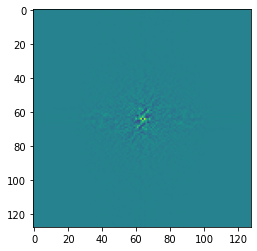

In [107]:
plt.figure(figsize=(4, 4))
plt.imshow(DD_[..., 200].real)

## Samping function $S$

In [161]:
line_spacing = 200
line_n = 8
line_length = 6000
receiver_spacing = 25
receiver_n = (line_length / receiver_spacing) + 1
size_x = (line_n - 1) * line_spacing
size_y = line_length

shape = size_y + 1, size_x + 1

from scipy.sparse import coo_matrix

cols, rows = np.mgrid[0:size_x+1:line_spacing, 0:size_y+1:receiver_spacing]
rows, cols = rows.ravel(), cols.ravel()
data = np.ones_like(rows)
S_R = coo_matrix((data, (rows, cols)), shape=shape)

In [162]:
arr = S_R.todense()

## Evaluation

$$ B_\mathrm{R} (r, r_f, z_f, \phi)\ \approx\ \frac{k^2}{4\pi^2}\! \iint\! \ e^{\mathrm{i}k_x (x - x_f)\ +\ \mathrm{i}k_y (y - y_f) }\ D'(k_x, k_y, \phi)\ \frac{(z_\mathrm{f} - z_\mathrm{r})^2}{\mathrm{\Delta} r_\mathrm{f}^4}\ dx_\mathrm{r}\,dy_\mathrm{r} $$

where $D'$ is the 2D Fourier transform, $\phi$ is frequency, $\Delta r_\mathrm{f}$ is $\sqrt{(x_f - x_r)^2 + (y_f - y_r)^2 + (z_f - z_r)^2}$

In [163]:
def delta_rf():
    return np.sqrt((xf - xr)**2 + (yf - yr)**2 + zf**2)

def exponential(kx, ky, x, y, xf, yf):
    return np.exp(1j * (x - xf) + ij * (y - yf))

def detector_beam(k, zf, r):
    """
    Assume zr = z0 = 0
    """
    k_term = k**2 / (4 * np.pi**2)
    z_term = zf**2 / delta_rf()**4

(6001, 1401)

In [ ]:
D_prime = np.fft.fftshift(np.fft.fft2(arr))

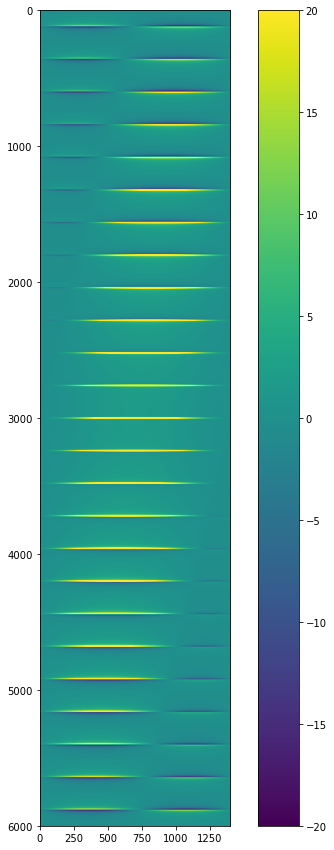

In [186]:
plt.figure(figsize=(10, 15))
plt.imshow(D_prime.real, aspect=1, vmin=-20, vmax=20, interpolation='bicubic')
plt.colorbar()